In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [27]:
def calculate_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def calculate_smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    nonzero_mask = denominator != 0
    smape = np.mean(np.abs(y_pred[nonzero_mask] - y_true[nonzero_mask]) / denominator[nonzero_mask]) * 100
    return smape



In [28]:
df_daily = pd.read_csv("daily_accidents.csv")
df_sarima = pd.read_csv("SARIMA.csv")
df_sarima_hol_week = pd.read_csv("SARIMA_hol_week.csv")
df_RNN = pd.read_csv("RNN.csv")
df_RNN_hol_week = pd.read_csv("RNN_hol_week.csv")
df_Transformer = pd.read_csv("Transformer.csv")
df_Transforme_hol_week = pd.read_csv("Transformer_hol_week.csv")
df_TFT = pd.read_csv("TFT.csv")
df_TFT_hol_week = pd.read_csv("TFT_hol_week.csv")
df_LSTransfomer = pd.read_csv("LSTransformer.csv")
df_LSTransformer_hol_week = pd.read_csv("LSTransformer_hol_week.csv")

In [29]:
n = min(
    df_sarima.shape[0],
    df_sarima_hol_week.shape[0],
    df_RNN.shape[0],
    df_RNN_hol_week.shape[0],
    df_Transformer.shape[0],
    df_Transforme_hol_week.shape[0],
    df_TFT.shape[0],
    df_TFT_hol_week.shape[0],
    df_LSTransfomer.shape[0],
    df_daily.shape[0],
    df_LSTransformer_hol_week.shape[0]
)

In [30]:
# SARIMA
SARIMA_RMSE = 30.881626907119408
SARIMA_MAE = 24.401035546429853
SARIMA_R2 = 0.2407246342734466
SARIMA_Correlation = 0.5800397424182442

# SARIMA_hol_week
SARIMA_hol_week_RMSE = 31.23807833100531
SARIMA_hol_week_MAE = 24.67303706067422
SARIMA_hol_week_R2 = 0.22309559252346722
SARIMA_hol_week_Correlation = 0.5452030794547537

# LSTM
LSTM_RMSE = 31.08243748359956
LSTM_MAE = 24.109880447387695
LSTM_R2 = 0.22560328245162964
LSTM_Correlation = 0.492148756980896

# GRU
GRU_RMSE = 31.824012337077622
GRU_MAE = 24.896503448486328
GRU_R2 = 0.1882108449935913
GRU_Correlation = 0.5239609479904175

# LSTM_hol_week
LSTM_hol_week_RMSE = 31.89522087627069
LSTM_hol_week_MAE = 24.80636978149414
LSTM_hol_week_R2 = 0.1845739483833313
LSTM_hol_week_Correlation = 0.48860105872154236

# GRU_hol_week
GRU_hol_week_RMSE = 28.015986647135954
GRU_hol_week_MAE = 21.695613861083984
GRU_hol_week_R2 = 0.37086302042007446
GRU_hol_week_Correlation = 0.6250824332237244

# Transformer
Transformer_RMSE = 30.075539661617047
Transformer_MAE = 23.628387451171875
Transformer_R2 = 0.26948028802871704
Transformer_Correlation = 0.5294751021921705

# Transformer_hol_week
Transformer_hol_week_RMSE = 30.07239980135927
Transformer_hol_week_MAE = 23.545352821763156
Transformer_hol_week_R2 = 0.2751142928618131
Transformer_hol_week_Correlation = 0.543097185952459

# TFT
TFT_RMSE = 30.99766482510215
TFT_MAE = 24.133407592773438
TFT_R2 = 0.1999918818473816
TFT_Correlation = 0.4494391942545254

# TFT_hol_week
TFT_hol_week_RMSE = 29.933020379448173
TFT_hol_week_MAE = 23.394549634348877
TFT_hol_week_R2 = 0.2654410910007079
TFT_hol_week_Correlation = 0.5993734666430955

# LSTransformer
LSTransformer_RMSE = 30.1629
LSTransformer_MAE = 23.5648
LSTransformer_R2 = 0.2705
LSTransformer_Correlation = 0.5634

# LSTransformer_hol_week
LSTransformer_hol_week_RMSE = 31.7263
LSTransformer_hol_week_MAE = 24.8171
LSTransformer_hol_week_R2 = 0.1929
LSTransformer_hol_week_Correlation = 0.5471

In [31]:
df_actual = df_daily.tail(n).reset_index(drop=True)
dates = pd.to_datetime(df_actual['CRASH DATE'])
actual_series = df_actual['ACCIDENT_COUNT']

model_preds = {
    'SARIMA': df_sarima['Predicted'].tail(n).reset_index(drop=True),
    'SARIMA_hol_week': df_sarima_hol_week['Predicted'].tail(n).reset_index(drop=True),
    'LSTM': df_RNN['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True),
    'GRU': df_RNN['GRU_ACCIDENT_COUNT'].tail(n).reset_index(drop=True),
    'LSTM_hol_week': df_RNN_hol_week['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True),
    'GRU_hol_week': df_RNN_hol_week['GRU_ACCIDENT_COUNT'].tail(n).reset_index(drop=True),
    'Transformer': df_Transformer.iloc[:, 2].tail(n).reset_index(drop=True),
    'Transformer_hol_week': df_Transforme_hol_week.iloc[:, 1].tail(n).reset_index(drop=True),
    'TFT': df_TFT['Predicted_ACCIDENT_COUNT'].tail(n).reset_index(drop=True),
    'TFT_hol_week': df_TFT_hol_week['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True),
    'LSTransformer': df_LSTransfomer.iloc[:, 1].tail(n).reset_index(drop=True),
    'LSTransformer_hol_week': df_LSTransformer_hol_week.iloc[:, 1].tail(n).reset_index(drop=True)
}

mape_values = {
    model: calculate_mape(actual_series, preds)
    for model, preds in model_preds.items()
}
smape_values = {
    model: calculate_smape(actual_series, preds)
    for model, preds in model_preds.items()
}


Метрика MAPE

GRU_hol_week: 8.948152176368781
Transformer_hol_week: 9.596248386715889
SARIMA: 9.872616011490482
LSTransformer: 9.93413542509227
TFT_hol_week: 9.970931039195081
LSTM: 9.974215481866114
TFT: 9.979975473218811
SARIMA_hol_week: 10.026445268520098
LSTM_hol_week: 10.059079446307994
Transformer: 10.158647427120181
LSTransformer_hol_week: 10.500265285089803
GRU: 10.558492626613557


c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


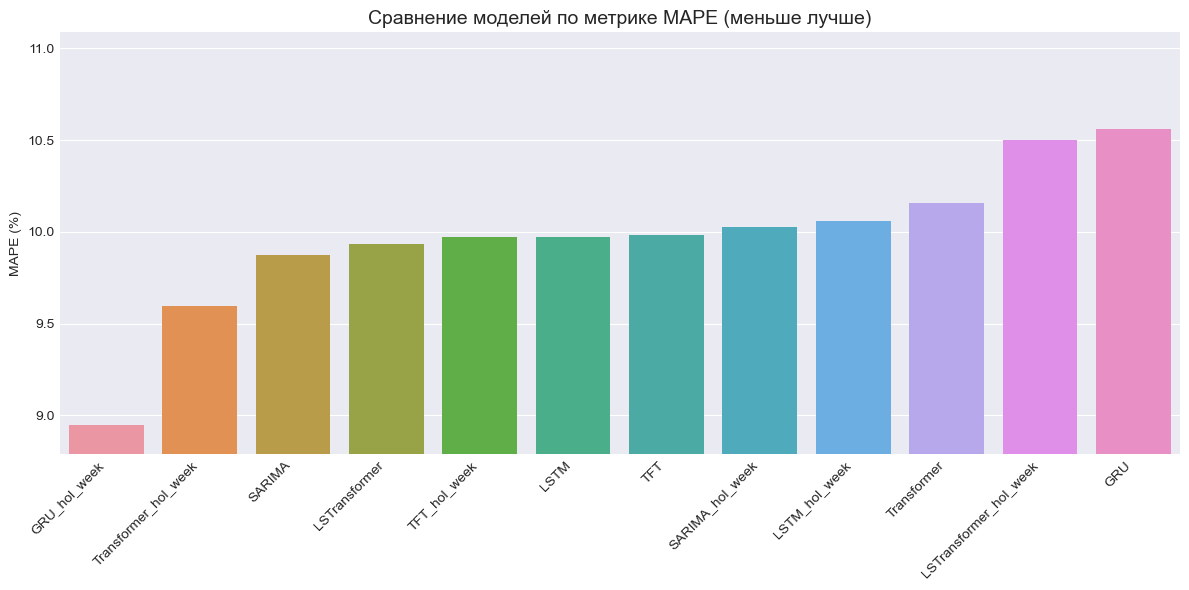

In [32]:
plt.figure(figsize=(12, 6))
sorted_mape = dict(sorted(mape_values.items(), key=lambda x: x[1]))
for i in sorted_mape:
    print(f'{i}: {sorted_mape[i]}')
sns.barplot(x=list(sorted_mape.keys()), y=list(sorted_mape.values()))
plt.title('Сравнение моделей по метрике MAPE (меньше лучше)', fontsize=14)
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45, ha='right')
min_val = min(sorted_mape.values())
offset = (max(sorted_mape.values()) - min_val) * 0.1
plt.ylim(bottom=min_val - offset)
plt.tight_layout()
plt.show()


Метрика SMAPE

GRU_hol_week: 8.653838650988394
TFT_hol_week: 9.377645733571342
Transformer_hol_week: 9.391241619243266
LSTransformer: 9.416827635213515
LSTM: 9.555033414968
TFT: 9.64846465713612
SARIMA: 9.746437836069848
LSTM_hol_week: 9.834387853471911
SARIMA_hol_week: 9.845943347720654
GRU: 9.897945251911331
LSTransformer_hol_week: 9.907221930167202
Transformer: 10.021036988196967


c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


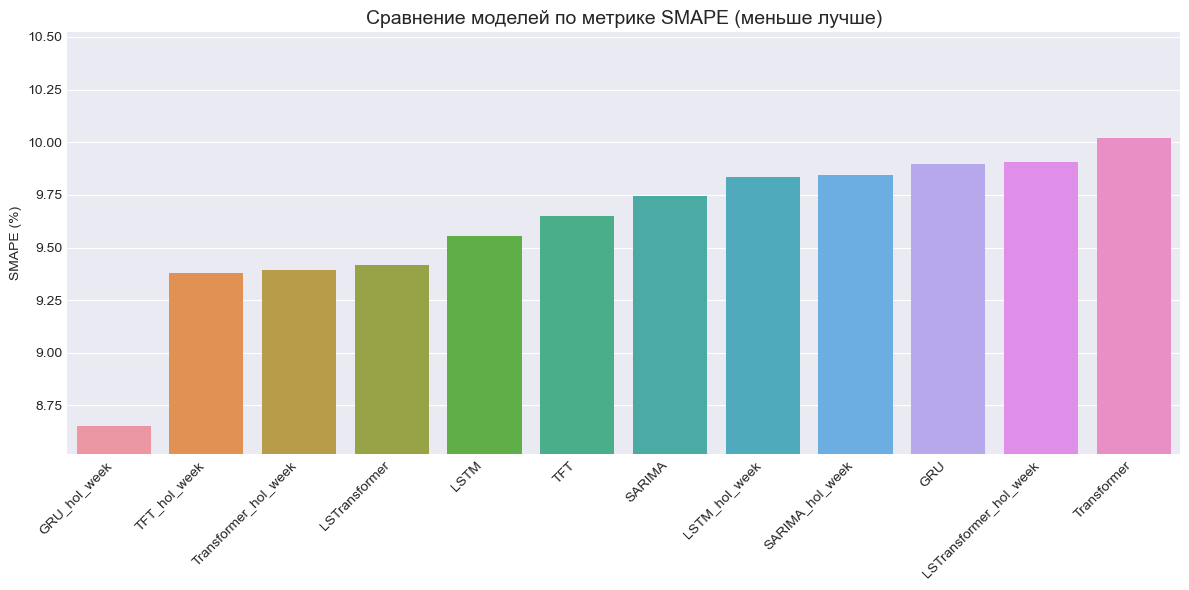

In [33]:
plt.figure(figsize=(12, 6))
sorted_smape = dict(sorted(smape_values.items(), key=lambda x: x[1]))
for i in sorted_smape:
    print(f'{i}: {sorted_smape[i]}')
sns.barplot(x=list(sorted_smape.keys()), y=list(sorted_smape.values()))
plt.title('Сравнение моделей по метрике SMAPE (меньше лучше)', fontsize=14)
plt.ylabel('SMAPE (%)')
plt.xticks(rotation=45, ha='right')
min_val = min(sorted_smape.values())
offset = (max(sorted_smape.values()) - min_val) * 0.1
plt.ylim(bottom=min_val - offset)
plt.tight_layout()
plt.show()


Графики метрик

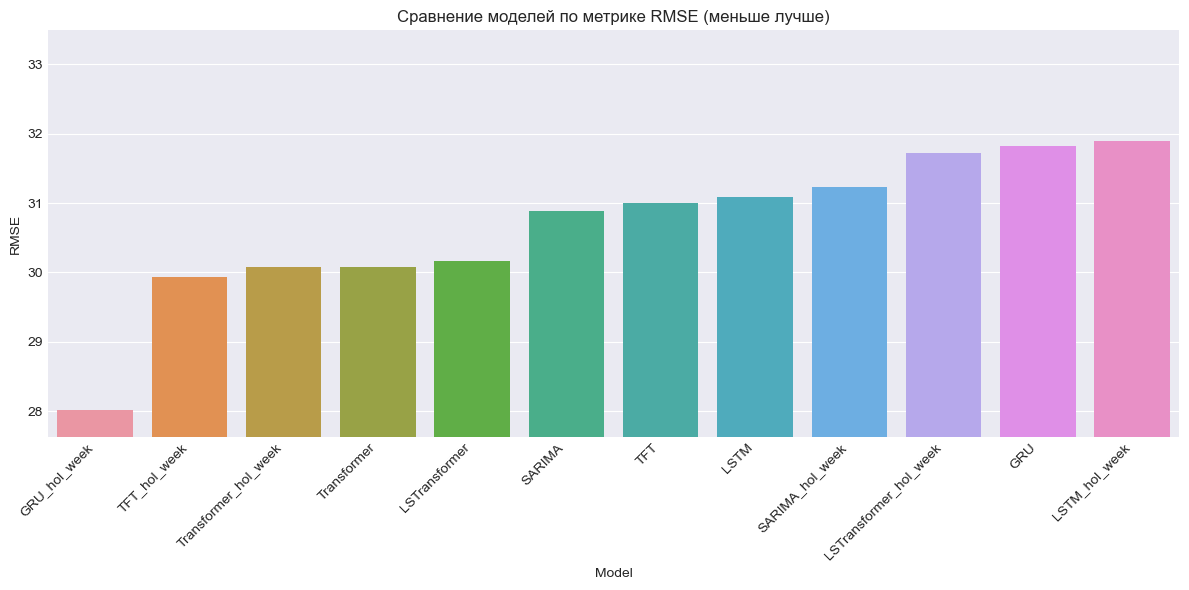

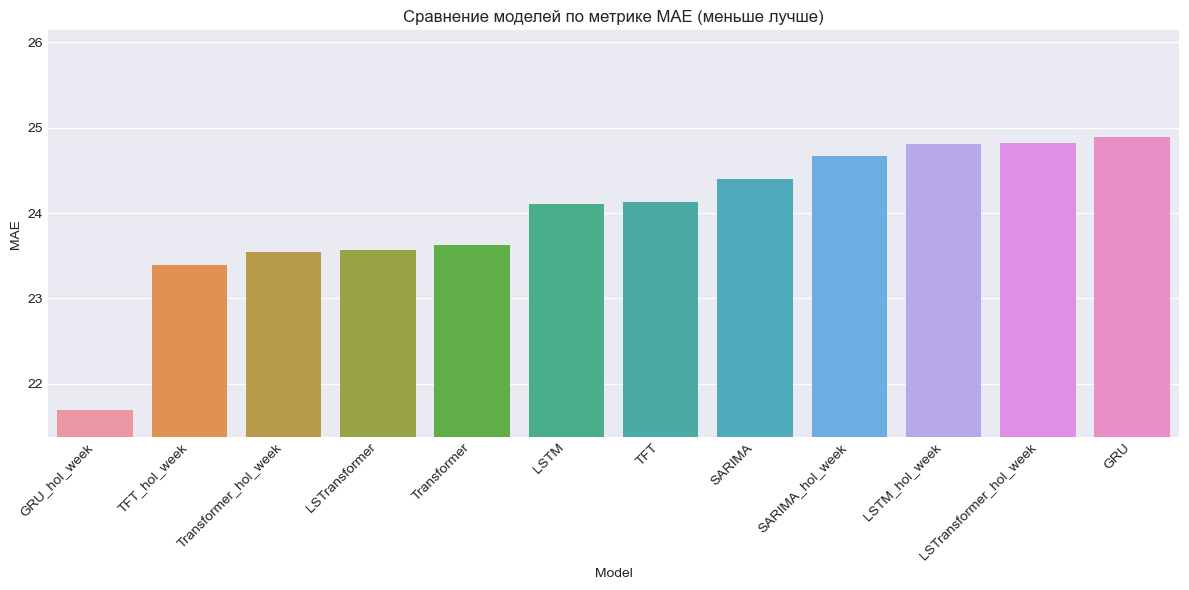

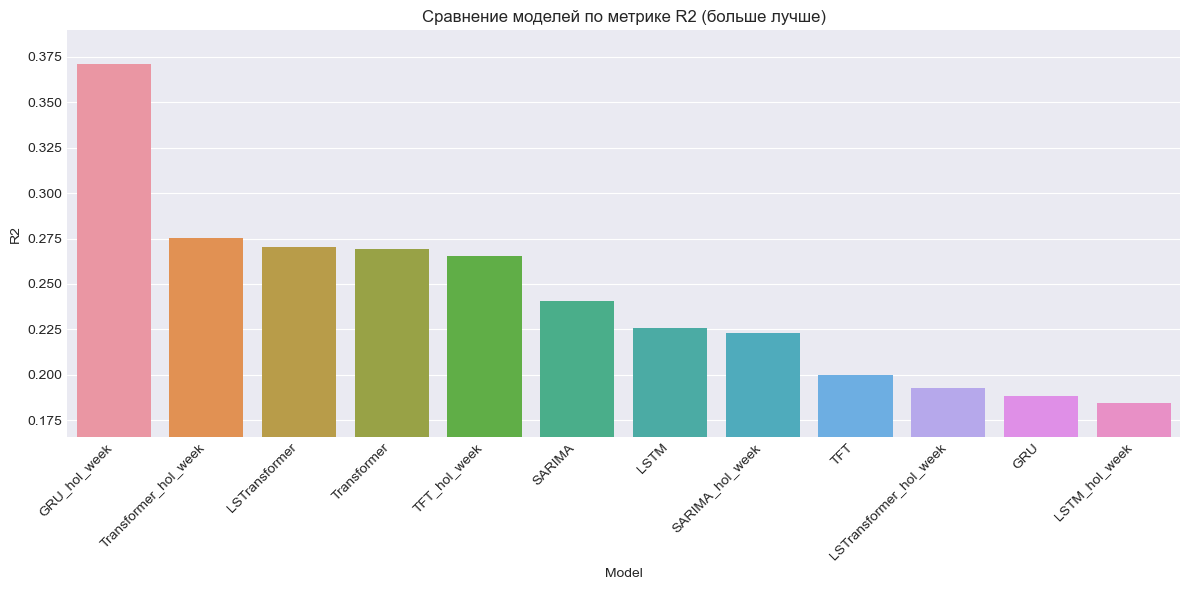

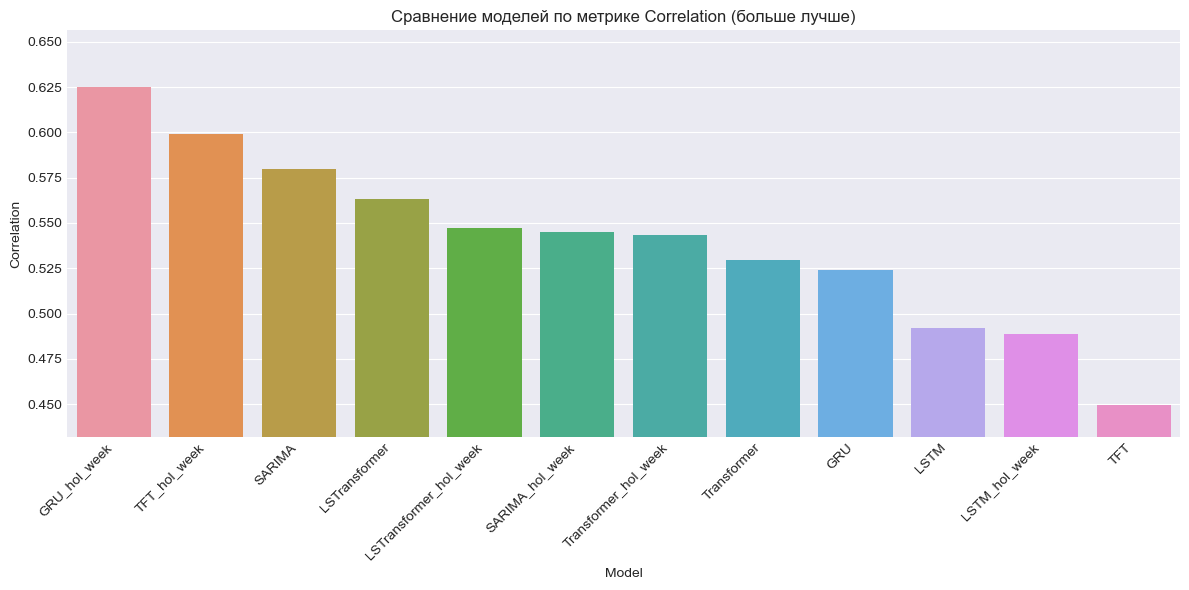

In [34]:
data = {
    "Model": [
        "SARIMA", "SARIMA_hol_week", "LSTM", "GRU", "LSTM_hol_week", "GRU_hol_week",
        "Transformer", "Transformer_hol_week", "TFT", "TFT_hol_week",
        "LSTransformer", "LSTransformer_hol_week"
    ],
    "RMSE": [
        SARIMA_RMSE, SARIMA_hol_week_RMSE, LSTM_RMSE, GRU_RMSE, LSTM_hol_week_RMSE, GRU_hol_week_RMSE,
        Transformer_RMSE, Transformer_hol_week_RMSE, TFT_RMSE, TFT_hol_week_RMSE,
        LSTransformer_RMSE, LSTransformer_hol_week_RMSE
    ],
    "MAE": [
        SARIMA_MAE, SARIMA_hol_week_MAE, LSTM_MAE, GRU_MAE, LSTM_hol_week_MAE, GRU_hol_week_MAE,
        Transformer_MAE, Transformer_hol_week_MAE, TFT_MAE, TFT_hol_week_MAE,
        LSTransformer_MAE, LSTransformer_hol_week_MAE
    ],
    "R2": [
        SARIMA_R2, SARIMA_hol_week_R2, LSTM_R2, GRU_R2, LSTM_hol_week_R2, GRU_hol_week_R2,
        Transformer_R2, Transformer_hol_week_R2, TFT_R2, TFT_hol_week_R2,
        LSTransformer_R2, LSTransformer_hol_week_R2
    ],
    "Correlation": [
        SARIMA_Correlation, SARIMA_hol_week_Correlation, LSTM_Correlation, GRU_Correlation, LSTM_hol_week_Correlation, GRU_hol_week_Correlation,
        Transformer_Correlation, Transformer_hol_week_Correlation, TFT_Correlation, TFT_hol_week_Correlation,
        LSTransformer_Correlation, LSTransformer_hol_week_Correlation
    ]
}

metrics = ['RMSE', 'MAE', 'R2', 'Correlation']
df_metrics = pd.DataFrame(data)

for metric in metrics:
    plt.figure(figsize=(12, 6))
    
    ascending = metric in ['RMSE', 'MAE']
    sorted_df = df_metrics.sort_values(by=metric, ascending=ascending)
    
    sns.barplot(data=sorted_df, x="Model", y=metric)
    plt.title(f'Сравнение моделей по метрике {metric} ({"меньше лучше" if ascending else "больше лучше"})')
    plt.xticks(rotation=45, ha='right')
    min_val = sorted_df[metric].min()
    offset = (sorted_df[metric].max() - min_val) * 0.1
    plt.ylim(bottom=min_val - offset)
    plt.tight_layout()
    plt.show()


In [35]:
def plot_model(title, pred_series, dates, actual_series, label_pred):
    plt.figure(figsize=(14, 6))
    plt.plot(dates, actual_series, label='Actual', linewidth=2.5, color='black')
    plt.plot(dates, pred_series, label=label_pred, linewidth=2.0)
    plt.title(title, fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Accident Count')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [36]:
df_actual = df_daily.tail(n).reset_index(drop=True)
dates = pd.to_datetime(df_actual['CRASH DATE'])
actual_series = df_actual['ACCIDENT_COUNT']

SARIMA

Метрики: RMSE: 30.881626907119408, MAE: 24.401035546429853, R²: 0.2407246342734466, Correlation: 0.5800397424182442

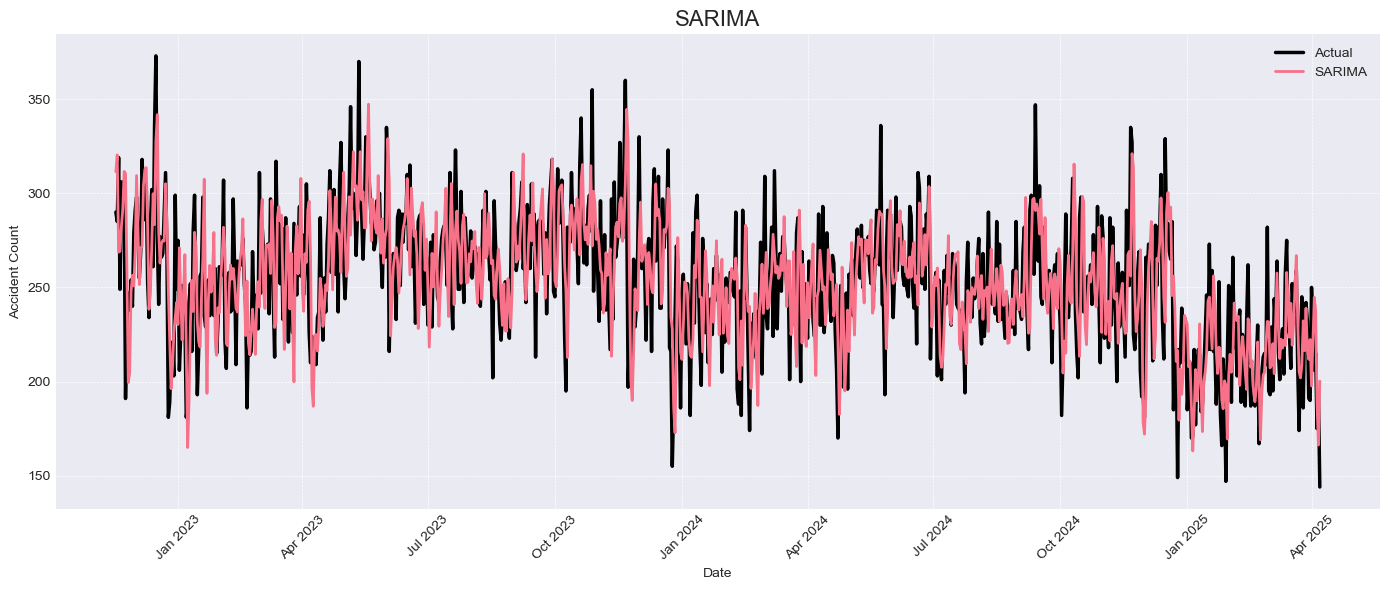

In [37]:
plot_model('SARIMA', df_sarima['Predicted'].tail(n).reset_index(drop=True), dates, actual_series, 'SARIMA')

SARIMA на расширенном датасете

Метрики:  RMSE: 31.23807833100531, MAE: 24.67303706067422, R²: 0.22309559252346722, Correlation: 0.5452030794547537

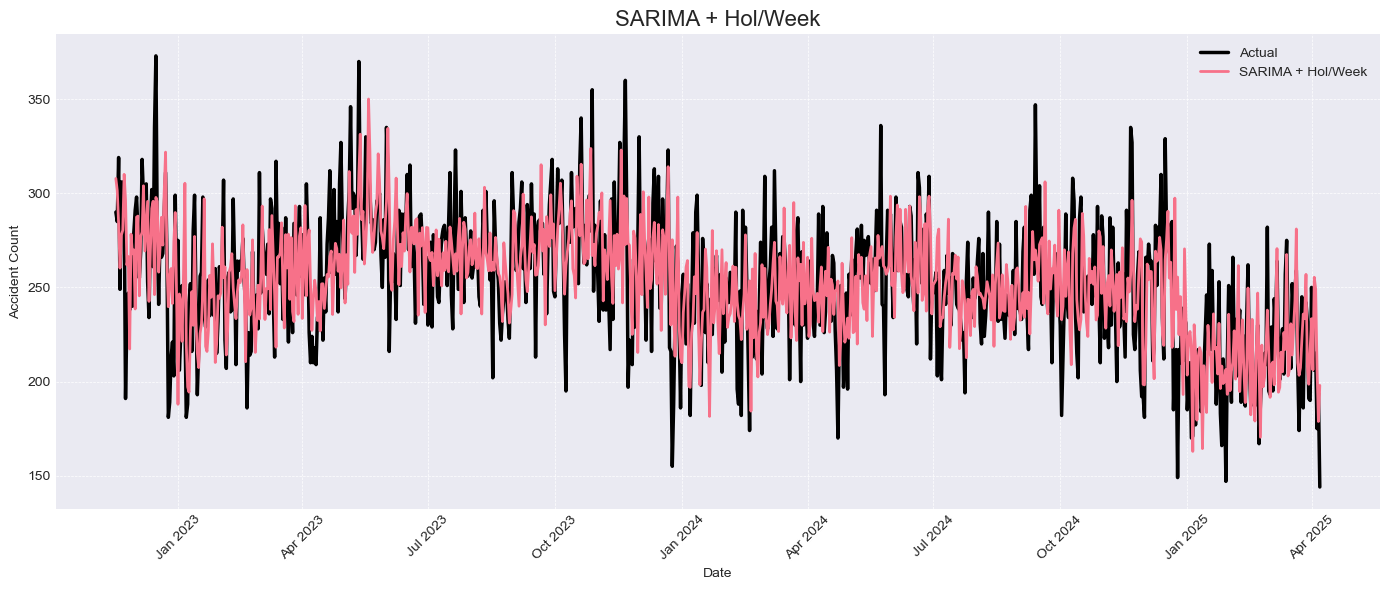

In [38]:
plot_model('SARIMA + Hol/Week', df_sarima_hol_week['Predicted'].tail(n).reset_index(drop=True), dates, actual_series, 'SARIMA + Hol/Week')

LSTM

Метрики: RMSE: 31.08243748359956, MAE: 24.109880447387695, R²: 0.22560328245162964, Correlation: 0.492148756980896

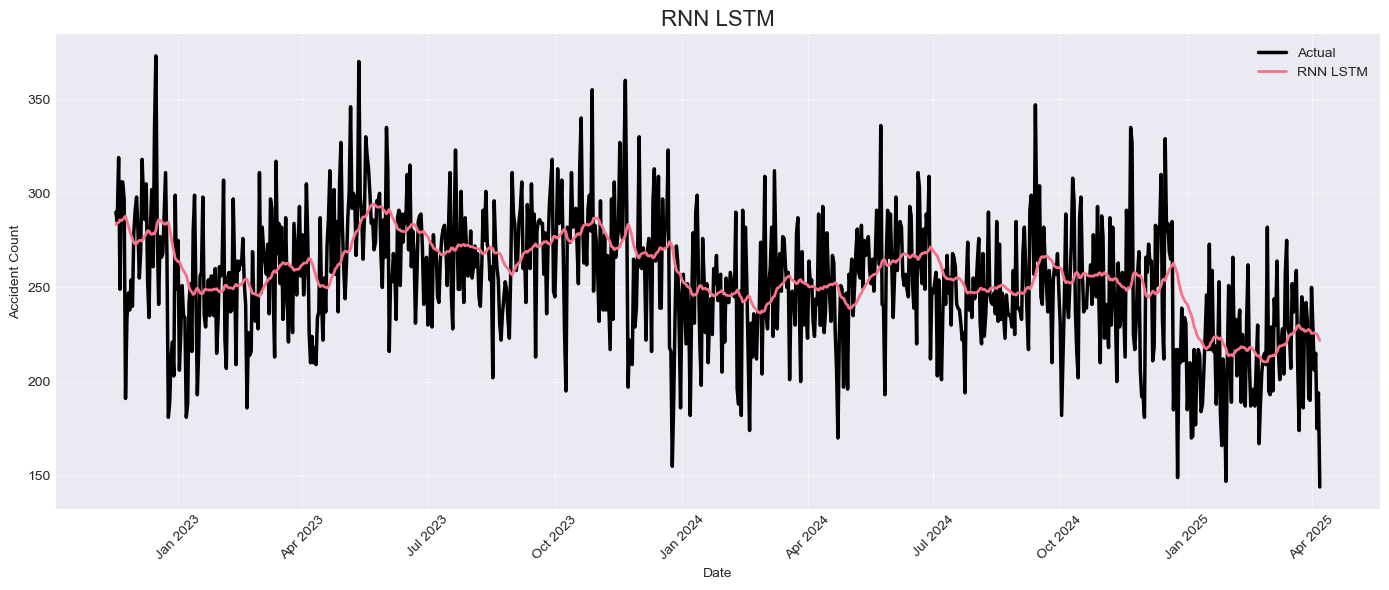

In [39]:
plot_model('RNN LSTM', df_RNN['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), dates, actual_series, 'RNN LSTM')

LSTM на расширенном датасете

Метрики: RMSE: 31.89522087627069, MAE: 24.80636978149414, R²: 0.1845739483833313, Correlation: 0.48860105872154236

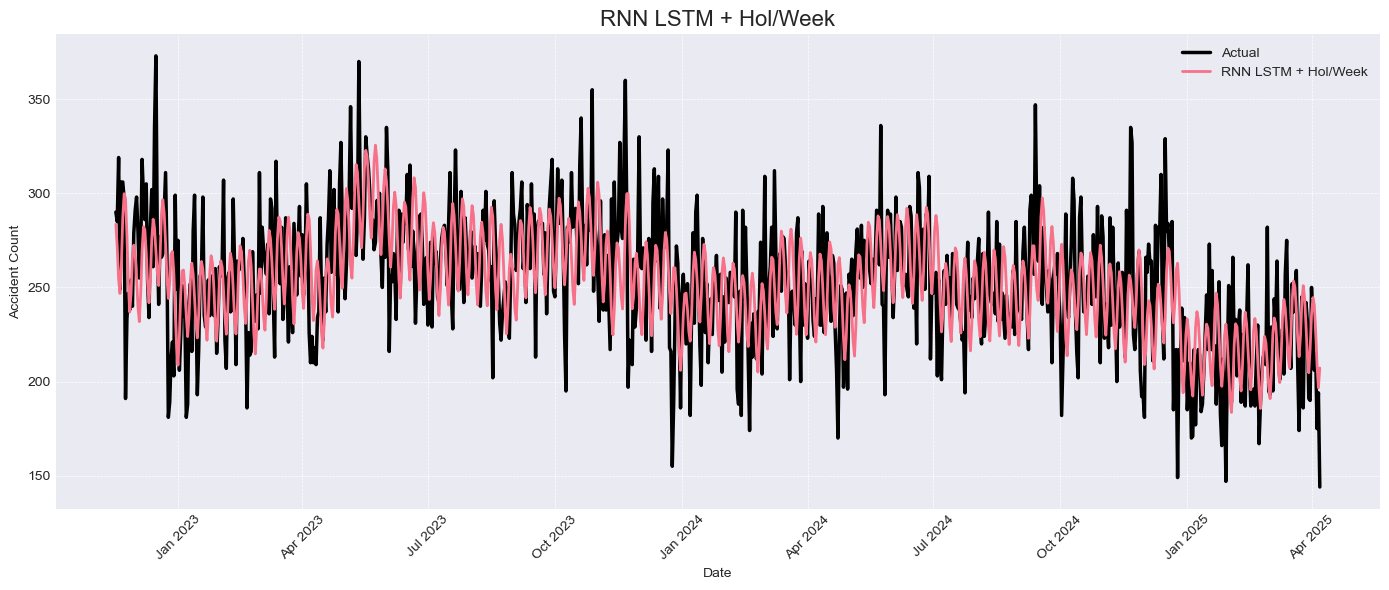

In [40]:
plot_model('RNN LSTM + Hol/Week', df_RNN_hol_week['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), dates, actual_series, 'RNN LSTM + Hol/Week')

GRU

Метрики: RMSE: 31.824012337077622, MAE: 24.896503448486328, R²: 0.1882108449935913, Correlation: 0.5239609479904175

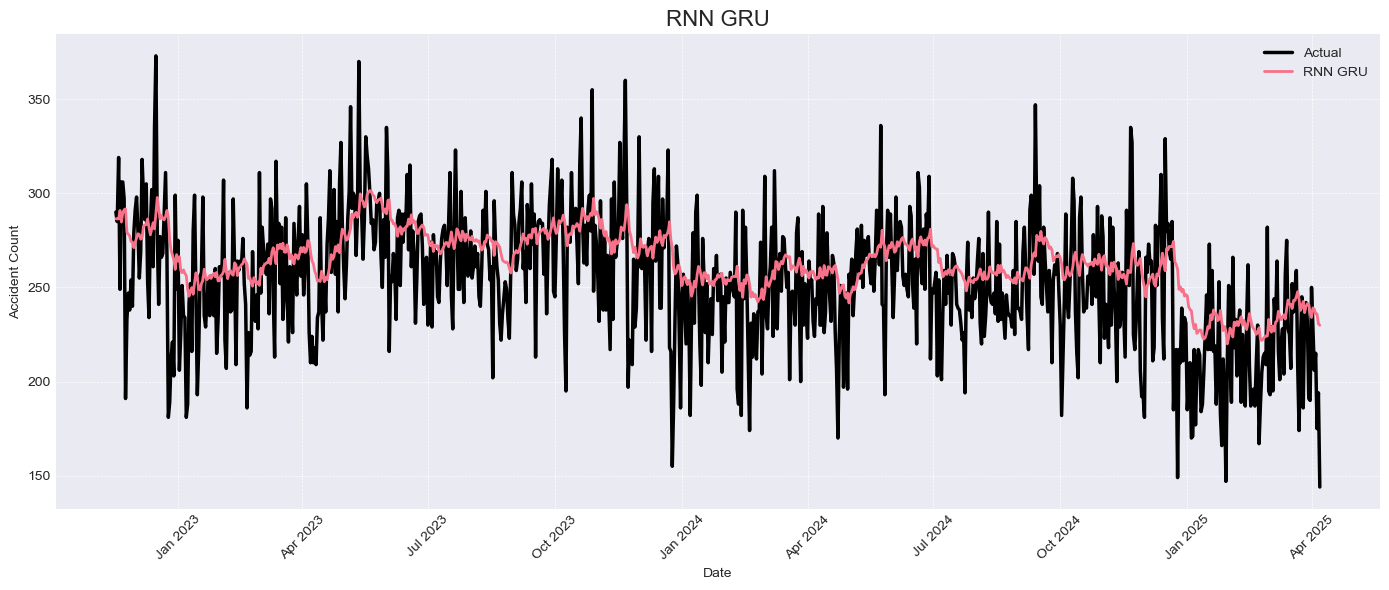

In [41]:
plot_model('RNN GRU', df_RNN['GRU_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), dates, actual_series, 'RNN GRU')

GRU на расширенном датасете

Метрики: RMSE: 28.015986647135954, MAE: 21.695613861083984, R²: 0.37086302042007446, Correlation: 0.6250824332237244

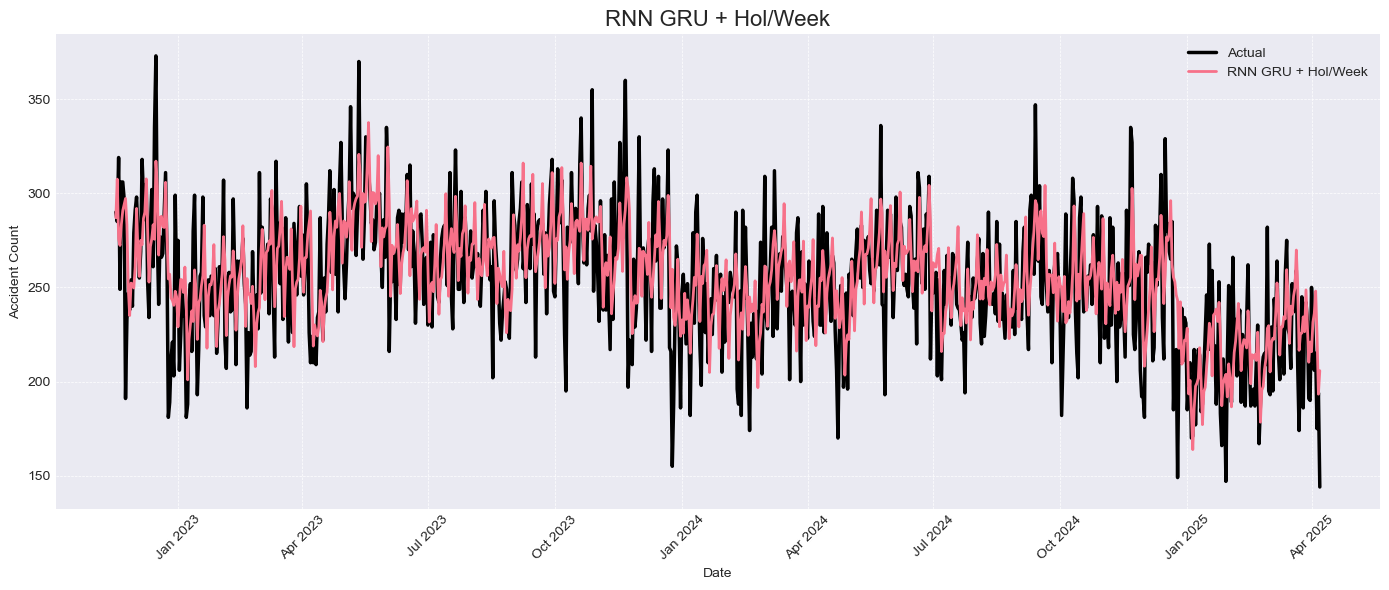

In [42]:
plot_model('RNN GRU + Hol/Week', df_RNN_hol_week['GRU_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), dates, actual_series, 'RNN GRU + Hol/Week')

Transformer

Метрики: RMSE: 30.075539661617047, MAE: 23.628387451171875, R²: 0.26948028802871704, Correlation: 0.5294751021921705

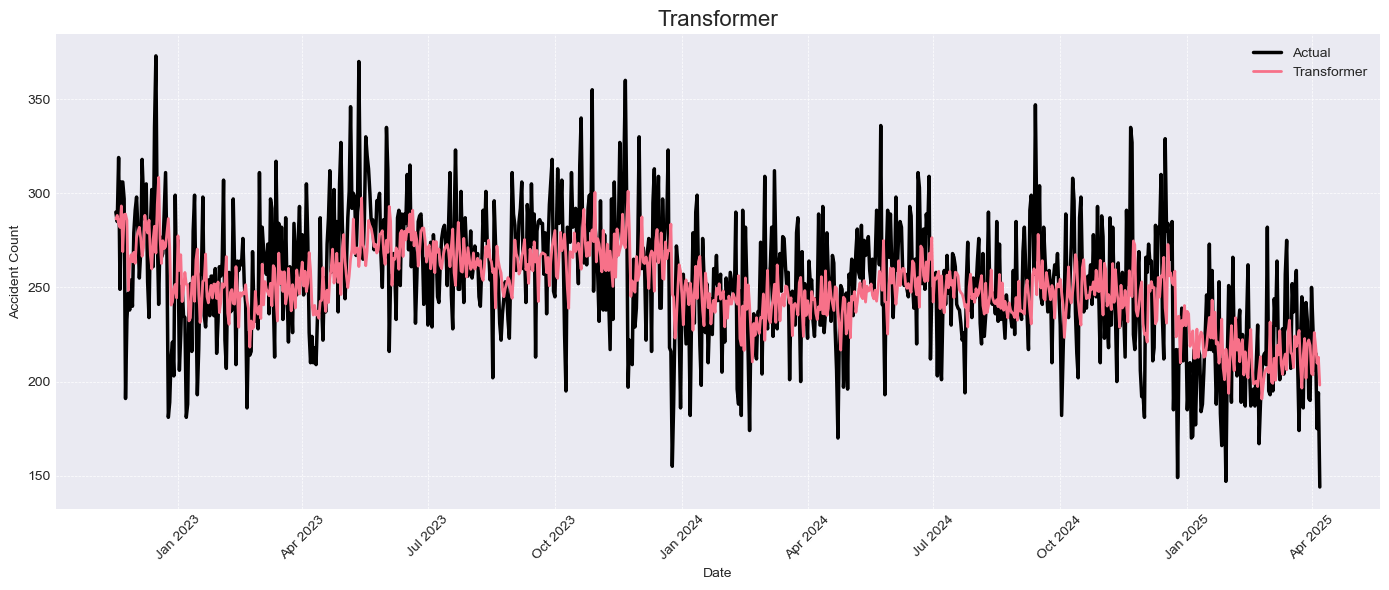

In [43]:
plot_model('Transformer', df_Transformer.iloc[:, 2].tail(n).reset_index(drop=True), dates, actual_series, 'Transformer')

Transformer на расширенном датасете

Метрики: RMSE: 30.07239980135927, MAE: 23.545352821763156, R²: 0.2751142928618131, Correlation: 0.543097185952459

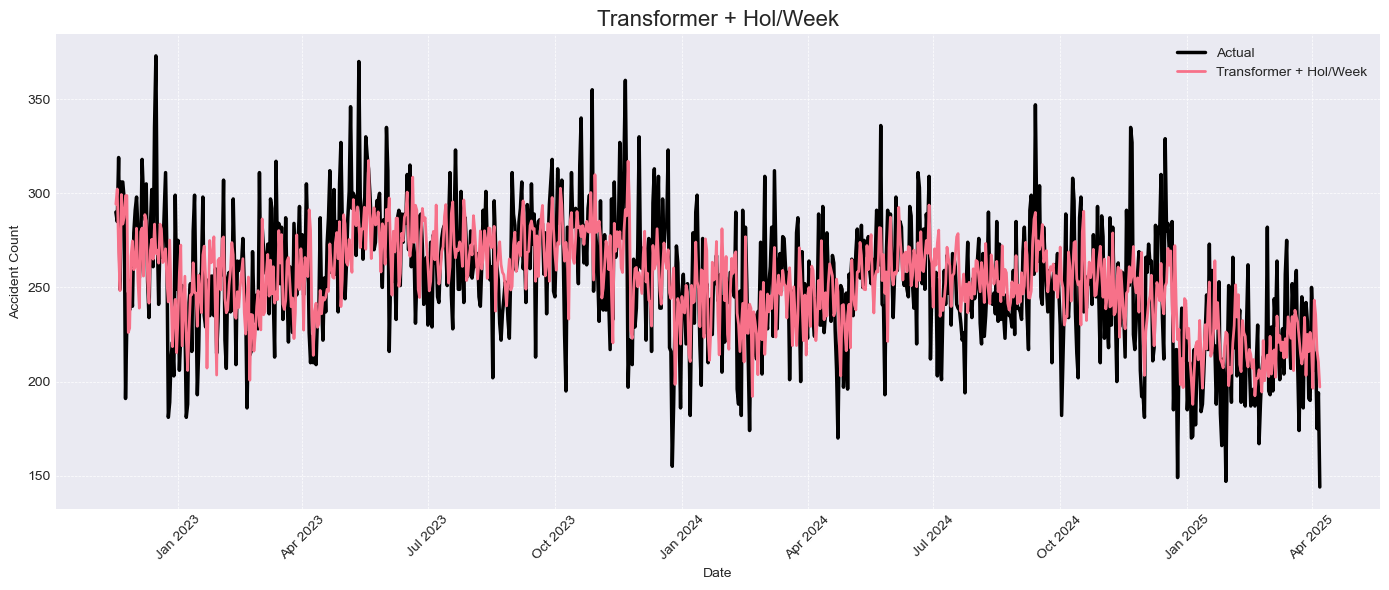

In [44]:
plot_model('Transformer + Hol/Week', df_Transforme_hol_week.iloc[:, 1].tail(n).reset_index(drop=True), dates, actual_series, 'Transformer + Hol/Week')

TFT

Метрики: RMSE: 30.99766482510215, MAE: 24.133407592773438, R²: 0.1999918818473816, Correlation: 0.4494391942545254

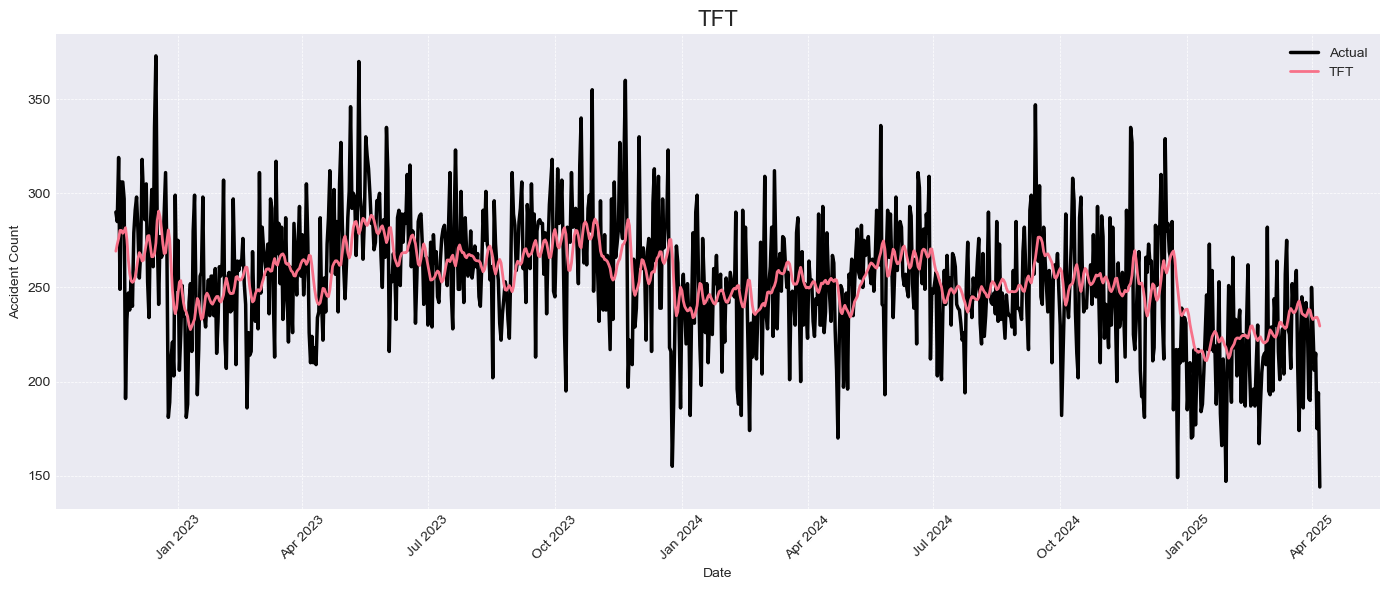

In [45]:
plot_model('TFT', df_TFT['Predicted_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), dates, actual_series, 'TFT')

TFT на расширенном датасете

Метрики: RMSE: 29.933020379448173, MAE: 23.394549634348877, R²: 0.2654410910007079, Correlation: 0.5993734666430955

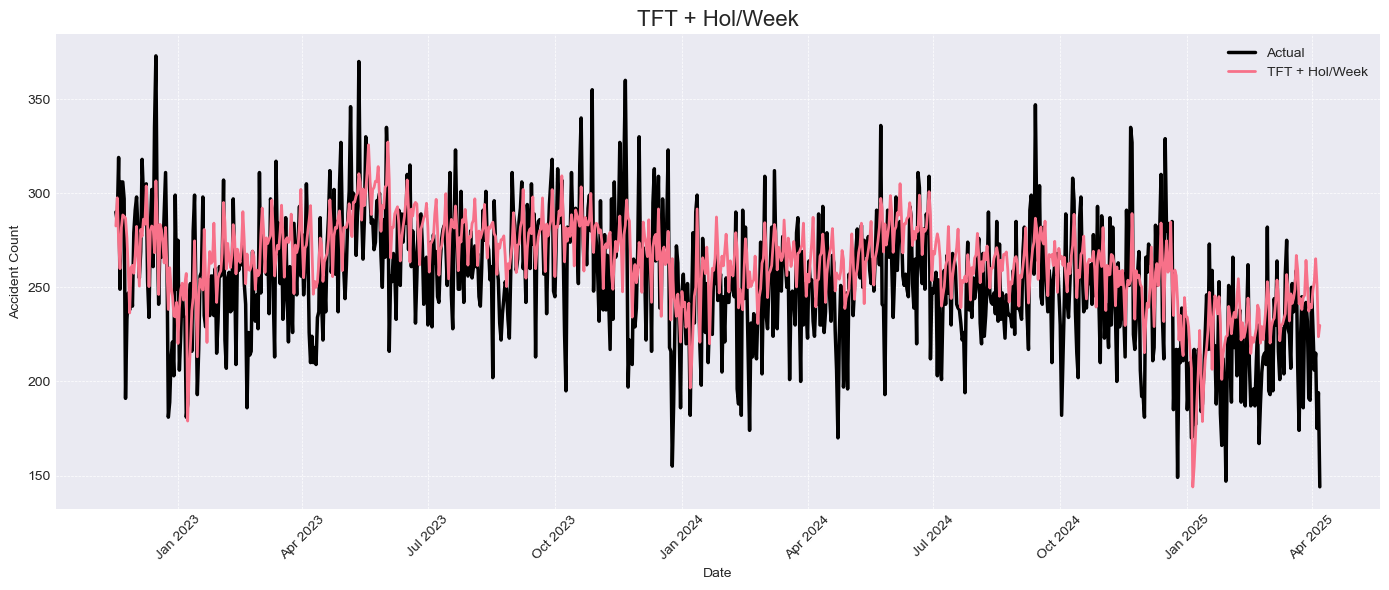

In [46]:

plot_model('TFT + Hol/Week', df_TFT_hol_week['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), dates, actual_series, 'TFT + Hol/Week')

LSTransformer

Метрики: RMSE: 30.5338, MAE: 24.0883, R²: 0.2525, Correlation: 0.5309

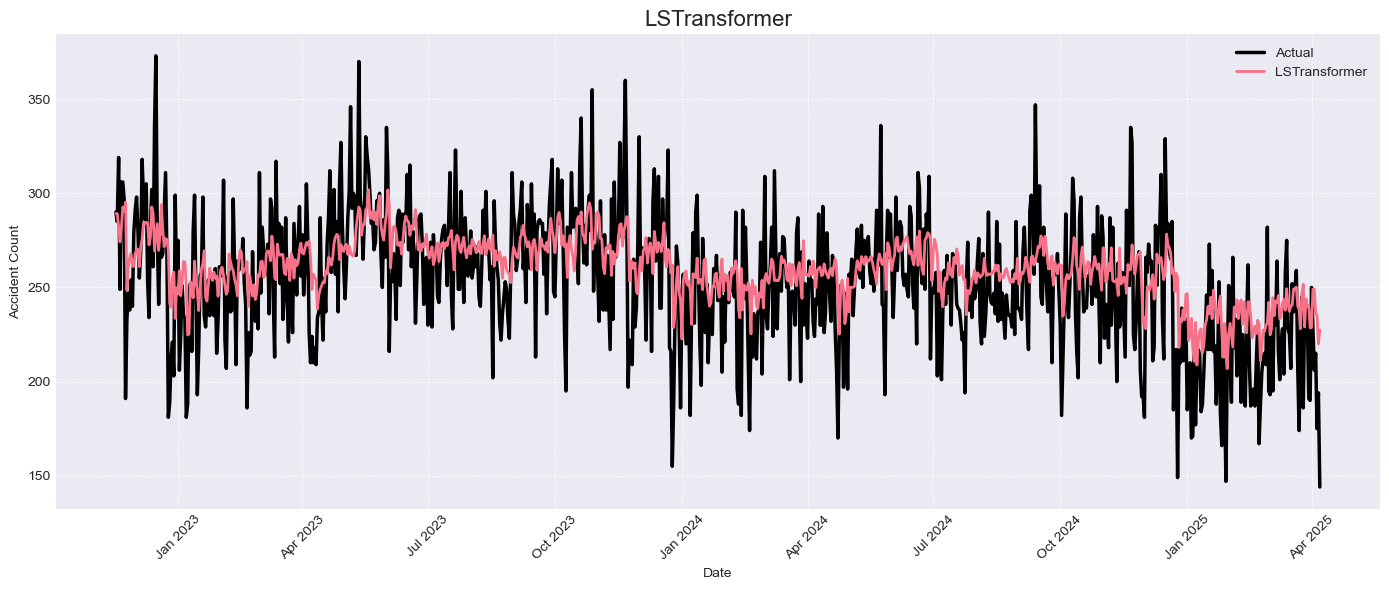

In [47]:
plot_model('LSTransformer', df_LSTransfomer.iloc[:, 1].tail(n).reset_index(drop=True), dates, actual_series, 'LSTransformer')

LSTransformer с расширенным датасетом

Метрики: RMSE: 31.4903, MAE: 24.5075, R²: 0.2049, Correlation: 0.5167

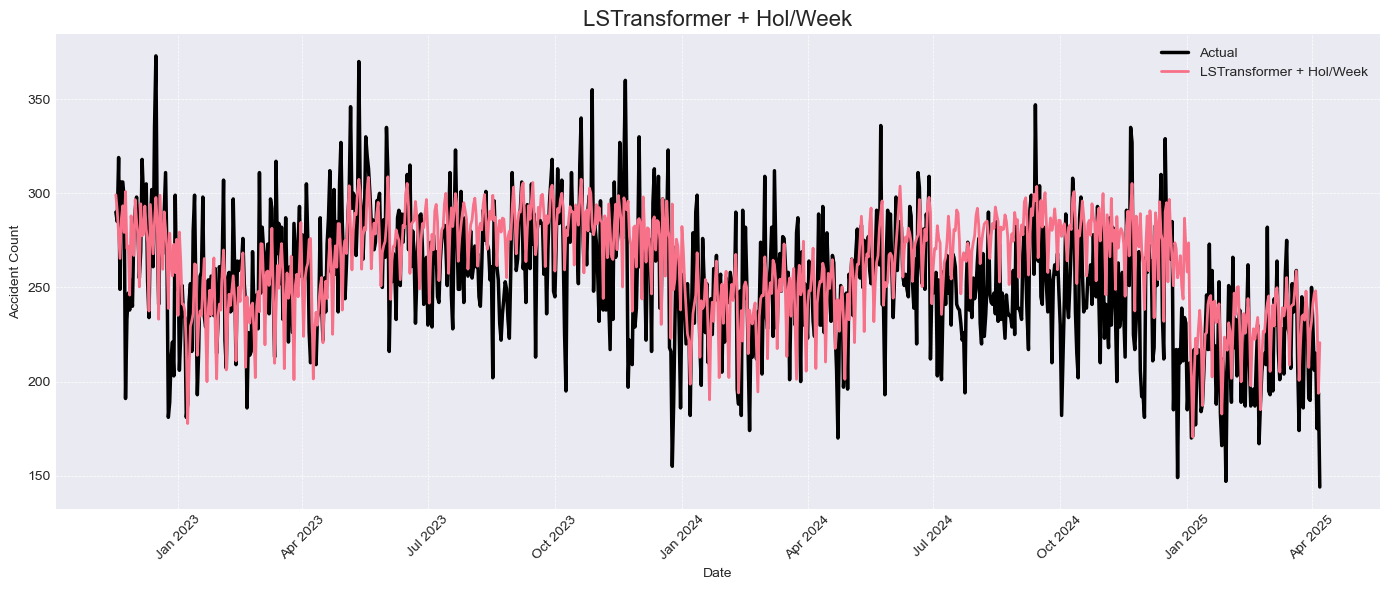

In [48]:
plot_model('LSTransformer + Hol/Week', df_LSTransformer_hol_week.iloc[:, 1].tail(n).reset_index(drop=True), dates, actual_series, 'LSTransformer + Hol/Week')

График всех предсказанных значений

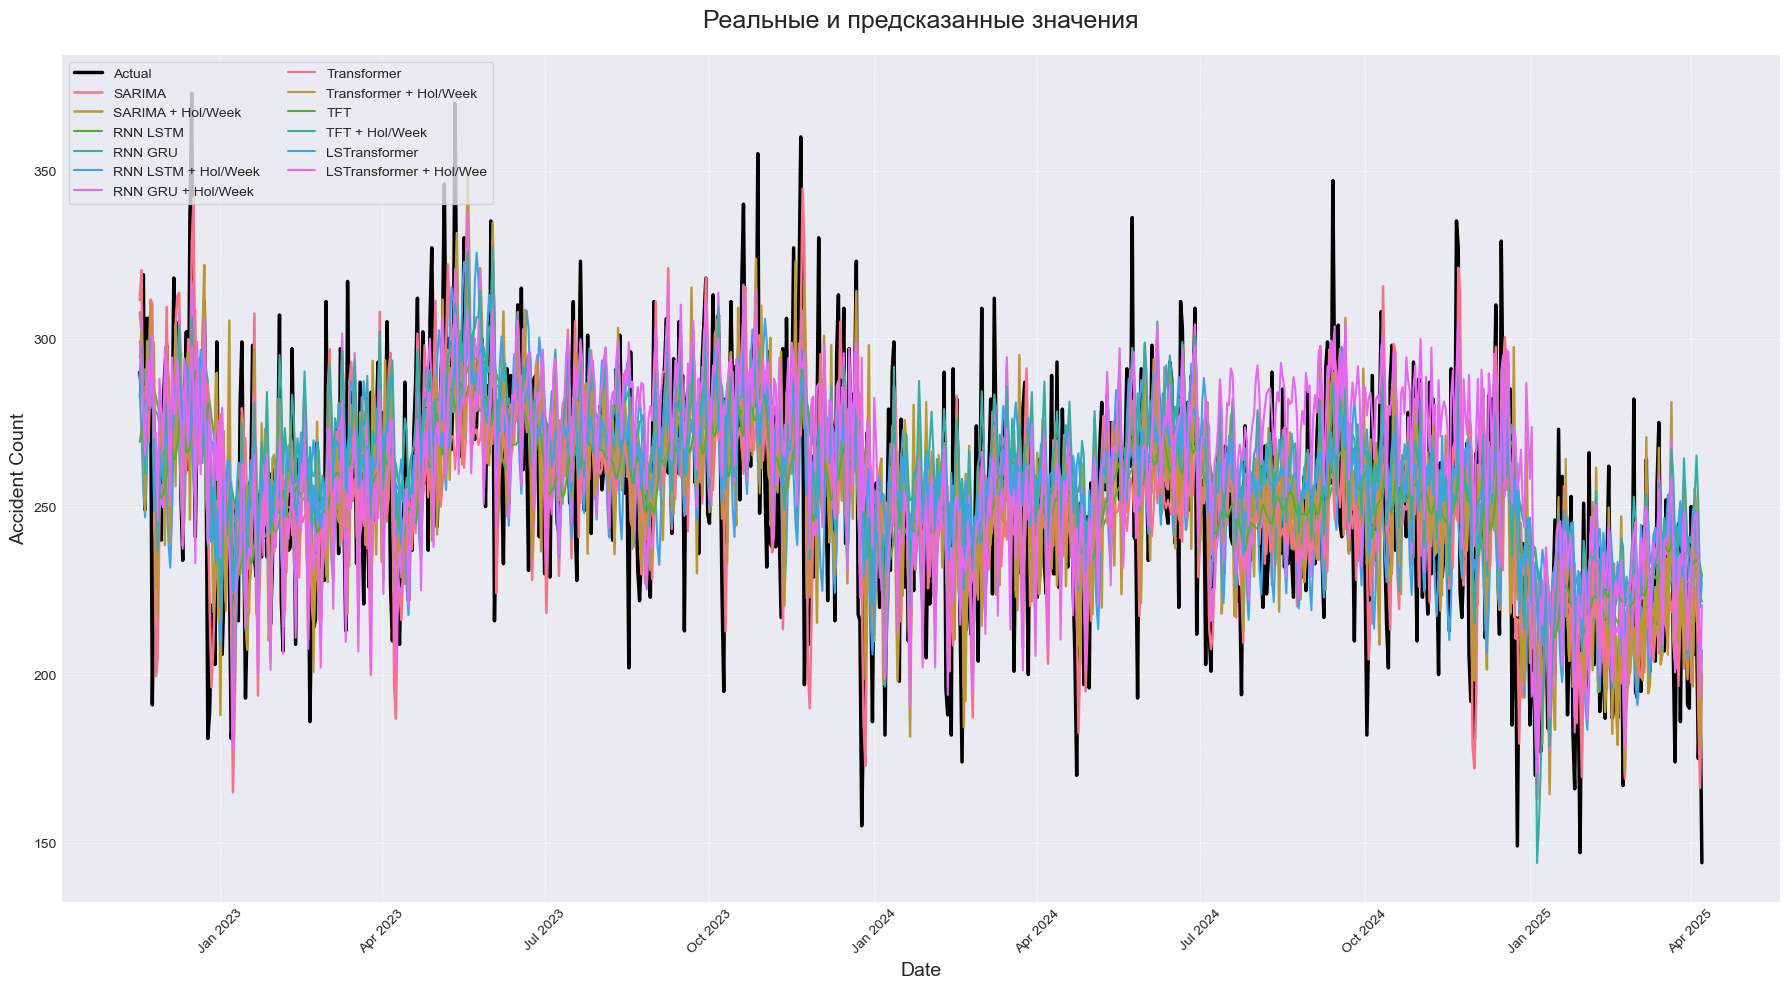

In [49]:
df_actual = df_daily.tail(n).reset_index(drop=True)
dates = pd.to_datetime(df_actual['CRASH DATE'])
actual_series = df_actual['ACCIDENT_COUNT']

fig, ax = plt.subplots(figsize=(18, 10))

ax.plot(dates, actual_series, label='Actual', linewidth=2.5, color='black', linestyle='-')

ax.plot(dates, df_sarima['Predicted'].tail(n).reset_index(drop=True), label='SARIMA', linewidth=1.8)
ax.plot(dates, df_sarima_hol_week['Predicted'].tail(n).reset_index(drop=True), label='SARIMA + Hol/Week', linewidth=1.8)

ax.plot(dates, df_RNN['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), label='RNN LSTM', linewidth=1.5)
ax.plot(dates, df_RNN['GRU_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), label='RNN GRU', linewidth=1.5)
ax.plot(dates, df_RNN_hol_week['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), label='RNN LSTM + Hol/Week', linewidth=1.5)
ax.plot(dates, df_RNN_hol_week['GRU_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), label='RNN GRU + Hol/Week', linewidth=1.5)

ax.plot(dates, df_Transformer.iloc[:, 2].tail(n).reset_index(drop=True), label='Transformer', linewidth=1.5)
ax.plot(dates, df_Transforme_hol_week.iloc[:, 1].tail(n).reset_index(drop=True), label='Transformer + Hol/Week', linewidth=1.5)

ax.plot(dates, df_TFT['Predicted_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), label='TFT', linewidth=1.5)
ax.plot(dates, df_TFT_hol_week['LSTM_ACCIDENT_COUNT'].tail(n).reset_index(drop=True), label='TFT + Hol/Week', linewidth=1.5)

ax.plot(dates, df_LSTransfomer.iloc[:, 1].tail(n).reset_index(drop=True), label='LSTransformer', linewidth=1.5)
ax.plot(dates, df_LSTransformer_hol_week.iloc[:, 1].tail(n).reset_index(drop=True), label='LSTransformer + Hol/Wee', linewidth=1.5)

ax.set_title('Реальные и предсказанные значения', fontsize=18, pad=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Accident Count', fontsize=14)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

ax.legend(loc='upper left', fontsize=10, ncol=2, frameon=True)
ax.grid(True, which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
